In [6]:
import pandas as pd

df = pd.read_csv('../extract/data/dataframe.csv', sep=';')

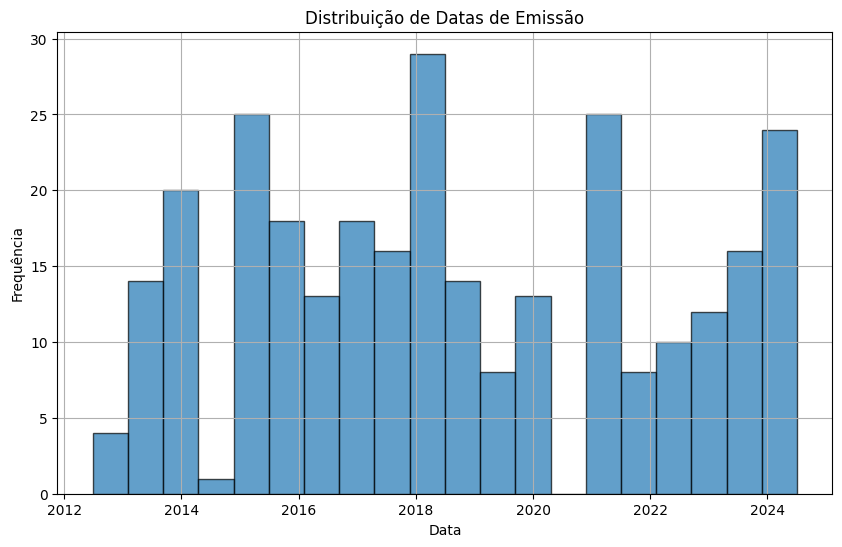

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
df['dc.date.issued'].dropna().astype('datetime64[ns]').hist(bins=20, edgecolor='k', alpha=0.7) 
plt.title('Distribuição de Datas de Emissão') 
plt.xlabel('Data') 
plt.ylabel('Frequência') 
plt.grid(True)
plt.show()

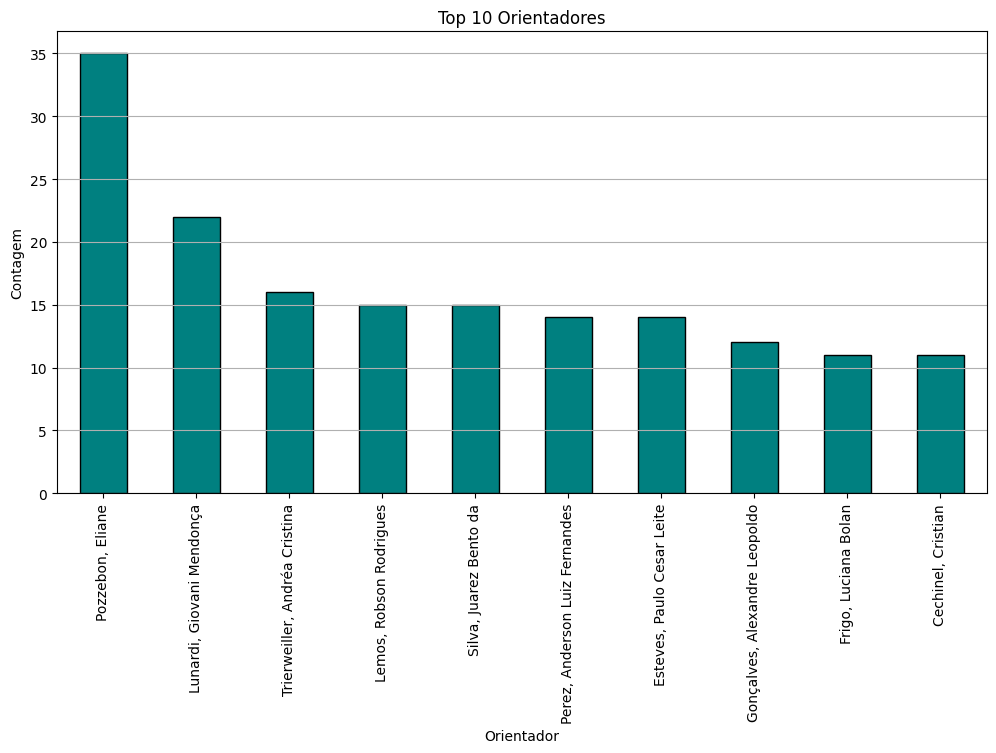

In [13]:
plt.figure(figsize=(12, 6)) 
df['dc.contributor.advisor'].value_counts().head(10).plot(kind='bar', color='teal', edgecolor='k') 
plt.title('Top 10 Orientadores') 
plt.xlabel('Orientador') 
plt.ylabel('Contagem') 
plt.grid(axis='y')
plt.show()

In [52]:
embedding = pd.read_csv('./data/embedding.csv')

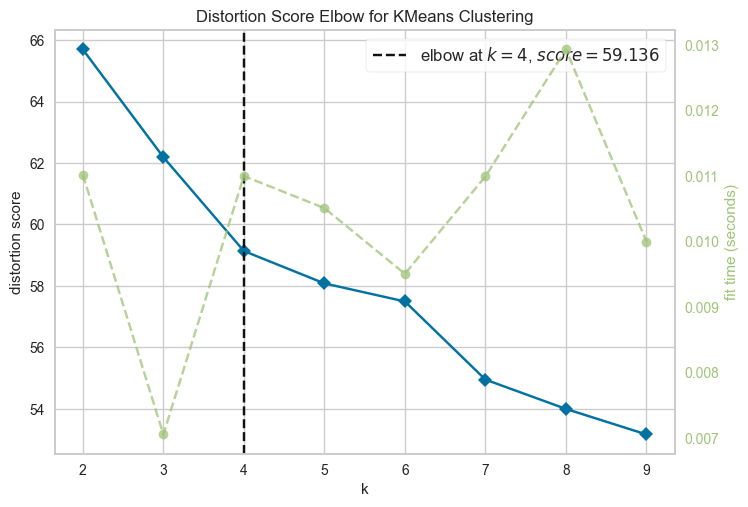

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(embedding)        # Fit the data to the visualizer
visualizer.show()

In [57]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np

def make_Silhouette_plot(X, n_clusters):
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg,
    )
# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=26)
        plt.xlabel("The silhouette coefficient values", fontsize=24)
        plt.ylabel("Cluster label", fontsize=24)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    print(f"N cluster: {n_clusters}")
    make_Silhouette_plot(embedding, n_clusters)   
    plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
    plt.close()

N cluster: 2
For n_clusters = 2 The average silhouette_score is : 0.07416445679870659
N cluster: 3
For n_clusters = 3 The average silhouette_score is : 0.07046761068442417
N cluster: 4
For n_clusters = 4 The average silhouette_score is : 0.06570491526344785
N cluster: 5
For n_clusters = 5 The average silhouette_score is : 0.06978844404885323
N cluster: 6
For n_clusters = 6 The average silhouette_score is : 0.06485351614652222
N cluster: 7
For n_clusters = 7 The average silhouette_score is : 0.05801527315507355
N cluster: 8
For n_clusters = 8 The average silhouette_score is : 0.05322052100710885
N cluster: 9
For n_clusters = 9 The average silhouette_score is : 0.04840353373724801


In [58]:
km = KMeans(n_clusters=4,
            init='k-means++', 
            n_init=10,
            max_iter=100, 
            random_state=42)

clusters_predict = km.fit_predict(embedding)

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure 
of each cluster with its most similar cluster, where similarity 
is the ratio of within-cluster distances to between-cluster distances.

The minimum value of the DB Index is 0, whereas a smaller 
value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(embedding,clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.

Calinski Harabaz Index is defined as the ratio of the 
sum of between-cluster dispersion and of within-cluster dispersion.

The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(embedding,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of 
fit of a clustering algorithm, but can also be used as 
a method for determining an optimal value of k (see here for more).

Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either
the data or the value of k is incorrect.

1 is the ideal value and indicates that clusters are very 
dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(embedding,clusters_predict)}")

Davies bouldin score: 2.9026652893886418
Calinski Score: 17.950098757665604
Silhouette Score: 0.0642671043497704


In [63]:
import prince
import plotly.express as px


def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    fig = px.scatter_3d(
          df, 
          x='comp1', 
          y='comp2', 
          z='comp3',
          color='cluster',
          template="plotly",
          
          # symbol = "cluster",
          
          color_discrete_sequence=px.colors.qualitative.Vivid,
          title=title).update_traces(
              # mode = 'markers',
              marker={
                  "size": 4,
                  "opacity": opacity,
                  # "symbol" : "diamond",
                  "line": {
                      "width": width_line,
                      "color": "black",
                  }
              }
          ).update_layout(
                  width = 800, 
                  height = 800, 
                  autosize = True, 
                  showlegend = True,
                  legend=dict(title_font_family="Times New Roman",
                              font=dict(size= 20)),
                  scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                              yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                              zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                  font = dict(family = "Gilroy", color  = 'black', size = 15))
        
    
    fig.show()